# Sales Data Analysis on Office Wares

In this analysis, I will be analysing about 3 years worth of sales data to answer specific business questions. The data contains thousands of store purchases by month, type, cost, etc. 

At the end of this project, I will be able to answer the following questions from the dataset:
1. What is the trend of the overall sales?
2. What are the top 10 products by sales?
3. What products are the most sold?
4. What ship mode is the most preferred?
5. What categories (and sub-categories) are the most profitable?

I will be using the pandas (for data manipulation), matplotlib  & seaborn libraries (for data visualization) in answering these questions. 
They will be applicable in:
- Adding columns
- Using the .apply() method
- Parsing cells as strings to make new columns (.str)
- Using groupby to perform aggregate analysis
- Plotting bar charts and line graphs for visualization

# Step 1:
Importing required libraries


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 2:
Import the dataset

In [ ]:
df = pd.read_excel('superstore_sales.xlsx')

# Step 3:
Analyze the data

In this section, I'll be viewing the first 5 rows to have an idea of the type of each column and their meanings. More like data cleaning

In [86]:
#first five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [87]:
#last five rows
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014,2014-12


In [88]:
#Shape of the dataset i.e number of rows and columns
df.shape

(51290, 22)

This dataset consist of 21 columns and 51290 rows.

In [89]:
#Names of the columns in this dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

Columns are:
- Order id
- Order date
- Ship date
- Ship mode
- Customer name
- Segment
- State
- Country
- Market
- Region
- Product id
- Category
- Sub-category
- Product name
- Sales
- Quantity
- Discount
- Profit
- Shipping cost
- Order priority
- Year


In [90]:
#Showing a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [91]:
#counting the number of missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
month_year        0
dtype: int64

There is no empty cell. We are good to go!

In [92]:
#Summary descriptive statistics on the dataset. This is done on the numerical columns
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


This shows the:
- Row count, which aligns to what the shape attribute showed.
- The mean (average).
- The standard deviation (how spread out the data is).
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

# Step 3
Exploratory Analysis: Here I'll be answering the objective questions

# Q1: What is the trend of the overall sales monthly?

In [93]:
#checking the minimum date
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

The earliest date in this dataset is 1st January, 2011

In [94]:
#checking the maximum date
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

The end date of this dataset is 31st December 2014.

In [95]:
#extracting the month and year from the order date and creating a new column for it
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [96]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

Next, I'll group my dataset by month year. In this instance, all the transaction made each month in a particular year is grouped together and summed up (for the numerical column)

In [102]:
df.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


However, I want to analyze this trend only by sales. Therefore my grouping would be by sales. I will also format it to the dataframe format using the reset_index function and giving it a name.

In [108]:
#Grouping month year by sales
monthly_trend = df.groupby('month_year').sum()['sales'].reset_index()

I will go ahead to plot this in other to see the monthly trend of the sales. The x-axis would be the month_year while the y-axis would be the sales.
The figure size would be 15 by 6, tilted to 90 degrees with a green coloured line

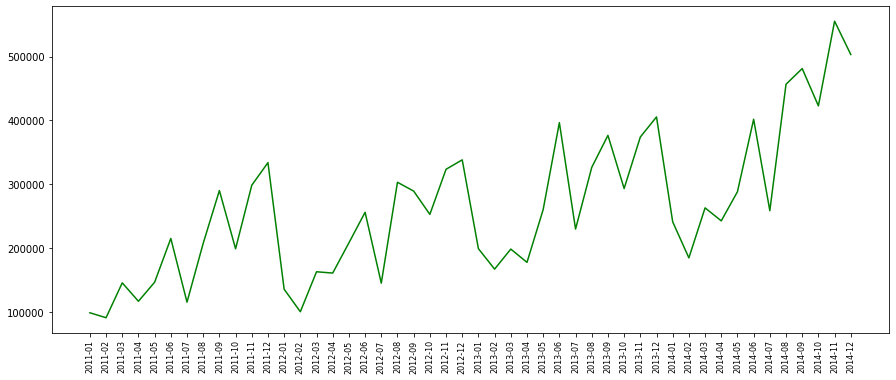

In [113]:
plt.figure(figsize=(15,6))
plt.plot(monthly_trend['month_year'], monthly_trend['sales'], color='g')
plt.xticks(rotation = 90, size=8)
plt.show()

# Answer to question 1
    
From the line chart above, the first four months of the sales were observed to be the lowest which increased by the 5th month upwards. However, in the month of July for every year, the store recorded a drop in sales and most sales were recorded in December of every year. 
In general, it can be deduced that the store is actually growing.

# Q2: What are the top 10 products by sales?

In this section, I'll be looking at the products that gave the most revenue using the product_name and sales column. This product names would be grouped by sales, converted to a dataframe using the pd.DataFrame function and given a name (product_sales), i.e making it an object

In [119]:
product_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

To get the top 10 products that brought in the most revenue, I'll sort the above data frame in descending order using the sort_values function

In [123]:
#Sorting product_sales column
product_sales = product_sales.sort_values('sales', ascending=False)

# Answer to question 2

In [125]:
#Fetching the top 10 products by sales
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


Although these items brought in the most revenue, it does not necessarily mean that they were the most sold. It could be that their prices were high enough to be on this table. In the next section, I'll be looking at the most sold products.

# Question 3: What products are the most sold?

As previously stated, I'll be analyzing the most sold products in this section, i.e the products with the highest quantities sold. I'll group the product name by quantity, convert to a data frame using the pd.DataFrame function and given a name (most_sold_products), i.e making it an object 

In [128]:
#Grouping the product_name by quantity
most_sold_products = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [130]:
#Sorting the most sold column
most_sold_products = most_sold_products.sort_values('quantity', ascending=False)

# Answer to question 3

In [131]:
#Fetching the top 10 most sold products
most_sold_products[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


It should be noted that the above section did not account for the number of times each of these products were bought, therefore they could have the highest quantity bought but not the most preferred by customers.
Example:
Customer A came in at the beginning of the year, say January 2011 and purchased 200pcs of staples and through out that year no other staple was sold.
Different Customers comes in every month in the year 2011 to purchase 10pcs of Ibico Index tab making a total of 120pcs.

Although staples has a higher quantity, the Ibico Index tab had more customers. This implies that Ibico index tab was more sold than staples through out the year.

In the next section, I'll be analyzing the products name by the product id to see what products were the most purchased, i.e. what products did customers buy the most

In [143]:
#Grouping the product name by product id
most_purchased_by_customers = pd.DataFrame(df.groupby('product_name').count()['product_id'])

In [144]:
#Sorting the most purchased by customers column
most_purchased_by_customers = sold.sort_values('product_id', ascending=False)

In [145]:
#Fetching the top 10 products purchased by customers
most_purchased_by_customers[:10]

,product_id
product_name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83
"Sanford Pencil Sharpener, Water Color",80
"Smead File Cart, Single Width",77
"Stanley Pencil Sharpener, Water Color",75
"Acco Index Tab, Clear",75


# Question 4: What ship mode is the most preferred?

In this section, I'll be analyzing the shipping mode that is most preferred amog the customers. To do this I'll be counting the number of ship mode in the dataset and showing it in a plot using the seaborn library. Setting figure size as 10 by 8.5

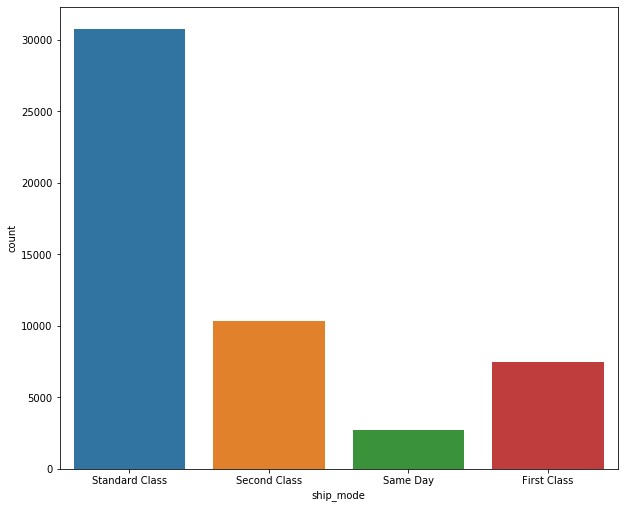

In [151]:
#Plotting Ship mode
plt.figure(figsize=(10, 8.5))
sns.countplot(df['ship_mode'])
plt.show()

# Answer to question 4

The most preferred ship mode is the standard class type.

# Question 5: What categories (and sub-categories) are the most profitable?

In this section, I'll find the categories (plus sub-categories) that gives the most profit. This would be done by grouping the these columns (category & sub-category) by profit

In [157]:
#Grouping category and subcategory
category_and_sucat_by_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Answer to question 5

In [159]:
#Sorting category by profit
category_and_sucat_by_profit.sort_values(['category', 'profit'], ascending = False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870